<a href="https://colab.research.google.com/github/sergioGarcia91/TRE_NN_MesaLosSantos/blob/main/07_100NN_models_maps_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.neural_network import MLPRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change letter

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-01-06 20:14:09--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-01-06 20:14:10--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.008s  

2025-01-06 20:14:10 (99.5 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path = 'Times New Roman.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load plugs data

In [ ]:
path_save_models = '/content/drive/MyDrive/Manuscritos_Investigacion/ModelosGeofisica_NN_MesaLosSantos_Congreso2023/100NN_models_maps_v2/'

In [ ]:
url = 'https://raw.githubusercontent.com/sergioGarcia91/ML_and_EDA/main/Datasets/PlugsMesaLosSantos_2022.csv'
# CSV lugs
df_Plugs = pd.read_csv(url, sep=';', decimal='.')

df_Plugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Muestra              358 non-null    object 
 1   Estacion             358 non-null    object 
 2   MuestraNew           358 non-null    object 
 3   X                    358 non-null    float64
 4   Y                    358 non-null    float64
 5   Z                    358 non-null    float64
 6   Formacion Geologica  358 non-null    object 
 7   Unidad               358 non-null    object 
 8   Litologia            358 non-null    object 
 9   Abreviacion          358 non-null    object 
 10  Uni-Lito             358 non-null    object 
 11  Agua [%]             358 non-null    float64
 12  Porosidad [%]        358 non-null    float64
 13  Densidad [gr/cm3]    358 non-null    float64
 14  Rho Dry [Ohm*m]      358 non-null    float64
 15  Rho Wet [Ohm*m]      358 non-null    flo

In [ ]:
df_Plugs.head()

,Muestra,Estacion,MuestraNew,X,Y,Z,Formacion Geologica,Unidad,Litologia,Abreviacion,...,M Dry [mV/V],M Wet [mV/V],Vp [m/s],Peak Load [kN],Is50 [MPa],LF [SI],HF [SI],FD [%],Distancia Falla [m],Unnamed: 25
0,Ls5-12,LSN-01,LSN-01,1114949.39,1246238.02,1745.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,8.65,22.49,1059.0,1.32,0.41,0.000015,0.000024,-61.45,1579.23,NaN
1,Ls5-13a,LSN-02,LSN-02a,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.65,21.16,1294.0,1.82,0.61,0.000008,0.000003,59.76,577.10,NaN
2,Ls5-13b,LSN-02,LSN-02b,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.83,14.52,2550.0,0.52,0.33,0.000021,0.000032,-49.71,577.10,NaN
3,Ls6-01,LSN-03,LSN-03,1115324.37,1256812.13,1677.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,47.46,7.52,3297.0,0.72,0.24,0.000003,0.000002,50.98,21.24,NaN
4,Ls6-02,LSN-04,LSN-04,1115076.27,1257212.30,1608.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.74,33.65,2175.0,0.42,0.13,0.000021,0.000036,-69.97,211.66,NaN


In [ ]:
df_Plugs.columns

Index(['Muestra', 'Estacion', 'MuestraNew', 'X', 'Y', 'Z',
       'Formacion Geologica', 'Unidad', 'Litologia', 'Abreviacion', 'Uni-Lito',
       'Agua [%]', 'Porosidad [%]', 'Densidad [gr/cm3]', 'Rho Dry [Ohm*m]',
       'Rho Wet [Ohm*m]', 'M Dry [mV/V]', 'M Wet [mV/V]', 'Vp [m/s]',
       'Peak Load [kN]', 'Is50 [MPa]', 'LF [SI]', 'HF [SI]', 'FD [%]',
       'Distancia Falla [m]', 'Unnamed: 25'],
      dtype='object')

In [ ]:
df_Plugs['Unidad'].unique()

array(['K1ls_ms', 'K1ls_mi', 'J1-2j', 'J1gp', 'Oss', 'K1ls_mm', 'K1r',
       'K1p', 'K1t'], dtype=object)

# Get data of interest

In [ ]:
df = df_Plugs[['X', 'Y', 'Z', 'Unidad', 'Distancia Falla [m]', 'Porosidad [%]']].copy()

df.head()

,X,Y,Z,Unidad,Distancia Falla [m],Porosidad [%]
0,1114949.39,1246238.02,1745.0,K1ls_ms,1579.23,10.98
1,1115819.32,1247030.08,1761.0,K1ls_ms,577.10,9.89
2,1115819.32,1247030.08,1761.0,K1ls_ms,577.10,7.84
3,1115324.37,1256812.13,1677.0,K1ls_ms,21.24,7.24
4,1115076.27,1257212.30,1608.0,K1ls_ms,211.66,20.17


## Data normalization

In [ ]:
df['Unidad'] = df['Unidad'].replace({'Oss':0, #silgara
                                     'J1gp':1, #granito
                                     'J1-2j':2, #jordan
                                     'K1ls_mi':3, #santos inf
                                     'K1ls_mm':4, #santos med
                                     'K1ls_ms':5, #santo sup
                                     'K1r':6, #rosablanca
                                     'K1p':7, #paja
                                     'K1t':8}) #tablazo

<ipython-input-13-b68bf6d415fd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Unidad'] = df['Unidad'].replace({'Oss':0, #silgara


In [ ]:
df.describe().round(2)

,X,Y,Z,Unidad,Distancia Falla [m],Porosidad [%]
count,358.00,358.00,358.00,358.00,358.00,358.00
mean,1107876.26,1247329.00,1353.93,4.47,383.45,4.85
std,5167.25,6687.66,228.39,2.08,316.74,5.32
min,1098421.74,1237639.21,719.00,0.00,0.02,0.00
25%,1103871.44,1242118.74,1203.00,3.00,149.64,0.83
50%,1107507.64,1245813.24,1343.00,5.00,306.19,3.25
75%,1112396.46,1252772.15,1546.00,6.00,526.82,7.22
max,1117932.04,1259982.90,1761.00,8.00,1628.54,32.93


In [ ]:
df['X'] = (df['X'] - 1096700) / (1120100 - 1096700)
df['Y'] = (df['Y'] - 1235500) / (1260100 - 1235500)
df['Z'] = (df['Z'] - (0)) / (1830 - (0))
df['Distancia Falla [m]'] = (df['Distancia Falla [m]'] - (000)) / (3000 - (000))

df.describe().round(2)

,X,Y,Z,Unidad,Distancia Falla [m],Porosidad [%]
count,358.00,358.00,358.00,358.00,358.00,358.00
mean,0.48,0.48,0.74,4.47,0.13,4.85
std,0.22,0.27,0.12,2.08,0.11,5.32
min,0.07,0.09,0.39,0.00,0.00,0.00
25%,0.31,0.27,0.66,3.00,0.05,0.83
50%,0.46,0.42,0.73,5.00,0.10,3.25
75%,0.67,0.70,0.84,6.00,0.18,7.22
max,0.91,1.00,0.96,8.00,0.54,32.93


In [ ]:
df.head()

,X,Y,Z,Unidad,Distancia Falla [m],Porosidad [%]
0,0.779888,0.436505,0.953552,5,0.526410,10.98
1,0.817065,0.468702,0.962295,5,0.192367,9.89
2,0.817065,0.468702,0.962295,5,0.192367,7.84
3,0.795913,0.866347,0.916393,5,0.007080,7.24
4,0.785311,0.882614,0.878689,5,0.070553,20.17


# OneHotEncoder

In [ ]:
df_encoded  = pd.get_dummies(df, columns=['Unidad'],
                             prefix='',
                             dtype=int)

df_encoded.head()

,X,Y,Z,Distancia Falla [m],Porosidad [%],_0,_1,_2,_3,_4,_5,_6,_7,_8
0,0.779888,0.436505,0.953552,0.526410,10.98,0,0,0,0,0,1,0,0,0
1,0.817065,0.468702,0.962295,0.192367,9.89,0,0,0,0,0,1,0,0,0
2,0.817065,0.468702,0.962295,0.192367,7.84,0,0,0,0,0,1,0,0,0
3,0.795913,0.866347,0.916393,0.007080,7.24,0,0,0,0,0,1,0,0,0
4,0.785311,0.882614,0.878689,0.070553,20.17,0,0,0,0,0,1,0,0,0


In [ ]:
# Move the 'Porosidad [%]' column to the end
column_to_move = 'Porosidad [%]'
df_encoded = df_encoded[[col for col in df_encoded.columns if col != column_to_move] + [column_to_move]]

# Include the 'Unidad' column to facilitate data augmentation
df_encoded = pd.concat([df_encoded, df_Plugs['Unidad']], axis=1)

df_encoded.head()

,X,Y,Z,Distancia Falla [m],_0,_1,_2,_3,_4,_5,_6,_7,_8,Porosidad [%],Unidad
0,0.779888,0.436505,0.953552,0.526410,0,0,0,0,0,1,0,0,0,10.98,K1ls_ms
1,0.817065,0.468702,0.962295,0.192367,0,0,0,0,0,1,0,0,0,9.89,K1ls_ms
2,0.817065,0.468702,0.962295,0.192367,0,0,0,0,0,1,0,0,0,7.84,K1ls_ms
3,0.795913,0.866347,0.916393,0.007080,0,0,0,0,0,1,0,0,0,7.24,K1ls_ms
4,0.785311,0.882614,0.878689,0.070553,0,0,0,0,0,1,0,0,0,20.17,K1ls_ms


In [ ]:
df_encoded['Unidad'].value_counts()

,count
Unidad,
K1ls_ms,112
K1r,101
J1-2j,55
Oss,26
K1p,19
K1ls_mi,15
K1t,13
K1ls_mm,9
J1gp,8


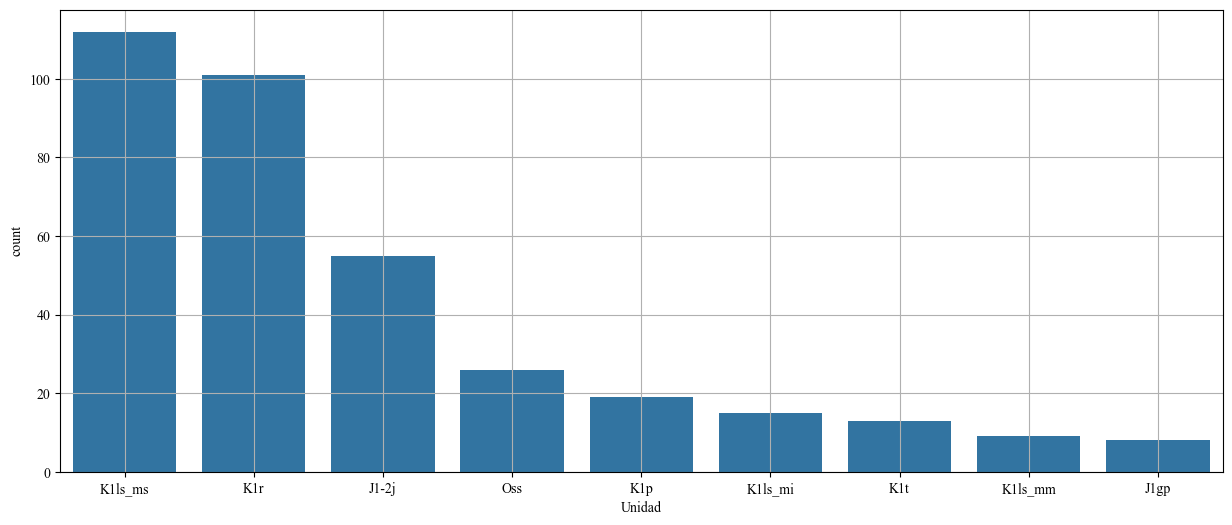

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(df_encoded, x='Unidad', order=df_encoded['Unidad'].value_counts().index)

plt.grid()

plt.show()


# Split and training

In [ ]:
print_text = False
print_text_Training = True
verbose_print = False

count_models = 1
target_score = 0.30

count_trial = 1

train_score_list = []
test_score_list = []
models_name_list = []
elapsed_time_list = []
trial_list = []


df = df_encoded.copy()

while count_models < 101:

  # Create empty DataFrames for train and test
  df_train = pd.DataFrame()
  df_test = pd.DataFrame()

  # Iterate over the unique values of the 'Unidad' column
  for category in df['Unidad'].unique():
    # Filter data
    category_data = df[df['Unidad'] == category]

    # Calculate 80% for train and 20% for test
    train_size = int(0.8 * len(category_data))
    test_size = len(category_data) - train_size

    # Select randomly to shuffle the data
    category_data = category_data.sample(frac=1).reset_index(drop=True)

    # Split into train and test
    category_train = category_data[:train_size]
    category_test = category_data[train_size:]

    if print_text:
      print(f'Category: {category}')
      print(f'Train size: {len(category_train)}')
      print(f'Test size: {len(category_test)}')
      print(f'Total size: {len(category_data)}')
      print('---'*3)

    while len(category_train) < 300:
      # Repeat data randomly until reaching 300
      category_train = pd.concat([category_train, category_train.sample(n=300 - len(category_train), replace=True)], ignore_index=True)
    if print_text:
      print(f'Train size: {len(category_train)}')
      print('\n')

    # Concatenate the data into the corresponding DataFrames
    df_train = pd.concat([df_train, category_train], ignore_index=True)
    df_test = pd.concat([df_test, category_test], ignore_index=True)
  if print_text:
    print(f'DF Train size: {df_train.shape[0]}')
    print(f'DF Test size: {df_test.shape[0]}')
    print('\n')

  # Datos to Train and Test
  X_train = df_train.iloc[:, :-2].to_numpy()
  y_train = df_train['Porosidad [%]'].to_numpy()

  X_test = df_test.iloc[:, :-2].to_numpy()
  y_test = df_test['Porosidad [%]'].to_numpy()

  # Generate noise with normal distribution (mean 0, standard deviation 5%)
  noise = np.random.normal(0, 0.05, size=X_train.shape)
  X_train = X_train * (1 + noise)

  if print_text:
    print('Shapes X_train, y_train, X_test, y_test')
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

  # Create the model
  hidden_layers = [26, 13, 7, 3]
  modelNN_MLPReg = MLPRegressor(hidden_layer_sizes=tuple(hidden_layers),
                                activation='relu',
                                verbose=verbose_print,
                                solver='adam',
                                max_iter=6000,
                                learning_rate= 'adaptive', #'adaptive', 'constant',
                                learning_rate_init=0.001,
                                tol=1e-5,
                                early_stopping=True,
                                n_iter_no_change=20,
                                validation_fraction=0.2)

  # Start the timer
  start_time = time.time()

  # Train the model
  print('---'*10)
  print(f'Trial: {count_trial}')
  modelNN_MLPReg.fit(X_train, y_train)

  # End the timer
  end_time = time.time()

  # Calculate the elapsed time
  elapsed_time = end_time - start_time

  train_score = modelNN_MLPReg.score(X_train, y_train)
  test_score = modelNN_MLPReg.score(X_test, y_test)

  if train_score > target_score:
    if print_text_Training:
      print(f'Train score: {train_score:.4f}')
      print(f'Test score: {test_score:.4f}')
      print(f'Elapsed time: {elapsed_time:.2f} seconds')
      print('\n')

    # Save model
    if count_models < 10:
      Name = f'model_map2_NN_00{count_models}.pkl'
    elif count_models < 100:
      Name = f'model_map2_NN_0{count_models}.pkl'
    else:
      Name = f'model_map2_NN_{count_models}.pkl'

    joblib.dump(modelNN_MLPReg, path_save_models + Name)
    print(f'---> Model saved as {Name}')
    print('\n')

    train_score_list.append(train_score)
    test_score_list.append(test_score)
    models_name_list.append(Name)
    elapsed_time_list.append(round(elapsed_time, 2))
    trial_list.append(count_trial)

    count_models += 1

  else:
    print(f'Train score: {train_score:.4f}')
    print(f'Elapsed time: {elapsed_time:.2f} seconds')
    print('No model was generated.')
    print('\n')

  count_trial += 1


------------------------------
Trial: 1
Train score: 0.4436
Test score: 0.2849
Elapsed time: 6.88 seconds


---> Model saved as model_map2_NN_001.pkl


------------------------------
Trial: 2
Train score: 0.4698
Test score: -0.2993
Elapsed time: 8.38 seconds


---> Model saved as model_map2_NN_002.pkl


------------------------------
Trial: 3
Train score: 0.5238
Test score: 0.3805
Elapsed time: 4.68 seconds


---> Model saved as model_map2_NN_003.pkl


------------------------------
Trial: 4
Train score: 0.5068
Test score: 0.0098
Elapsed time: 8.56 seconds


---> Model saved as model_map2_NN_004.pkl


------------------------------
Trial: 5
Train score: 0.6242
Test score: 0.0753
Elapsed time: 6.87 seconds


---> Model saved as model_map2_NN_005.pkl


------------------------------
Trial: 6
Train score: 0.5477
Test score: 0.0802
Elapsed time: 10.06 seconds


---> Model saved as model_map2_NN_006.pkl


------------------------------
Trial: 7
Train score: 0.7163
Test score: 0.2369
Elapsed

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score: 0.3791
Test score: 0.1012
Elapsed time: 1.87 seconds


---> Model saved as model_map2_NN_015.pkl


------------------------------
Trial: 19


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score: -0.5625
Elapsed time: 2.04 seconds
No model was generated.


------------------------------
Trial: 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score: -0.0481
Elapsed time: 1.58 seconds
No model was generated.


------------------------------
Trial: 21


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score: 0.2197
Elapsed time: 1.23 seconds
No model was generated.


------------------------------
Trial: 22


# Df models

In [ ]:
dict_model = {'Trial': trial_list,
              'Model': models_name_list,
              'Train score': train_score_list,
              'Test score': test_score_list,
              'Elapsed time': elapsed_time_list}

df_models = pd.DataFrame(dict_model)

df_models

In [ ]:
df_models.describe().round(2)

## Save Df

In [ ]:
df_models.to_csv(path_save_models + 'df_100models_map_v2.csv',
                 sep=';',
                 decimal=',',
                 index=False)

# End